# Pendulum Dataset

In [15]:
import torch
from matplotlib import pyplot as plt
import numpy as np
from src.forward_models.pendulum.visualization import plot_trajectories
from src.forward_models.pendulum.options import PendulumOptionParser
from src.forward_models.pendulum import generate_data

INFO:Pendulum Data Generation:
Arguments: Namespace(outdir=None, device='cpu', method='rk4', filename='simulations', n_samples=100, len_episode=100, dt=0.05, range_init=[-1.57, 1.57], range_omega=[0.785, 3.14], range_gamma=None, gamma_dist='uniform', range_A=None, A_dist='uniform', range_f=None, f_dist='uniform', single_sample_parameters=0, single_sample_params_probs=[0.5], div_eps=None, noise_loc=None, noise_std=0.01, seed=4321, visualize=False, n_stoch_samples=1, one_to_one=None, shuffle_data=0, log_level='INFO', library='torch')
INFO:Pendulum Data Generation:Using random seed 4321
INFO:Pendulum Data Generation:Parameters shape: torch.Size([100, 1, 1])
INFO:Pendulum Data Generation:Generating data using the forward model


Namespace(outdir=None, device='cpu', method='rk4', filename='simulations', n_samples=100, len_episode=100, dt=0.05, range_init=[-1.57, 1.57], range_omega=[0.785, 3.14], range_gamma=None, gamma_dist='uniform', range_A=None, A_dist='uniform', range_f=None, f_dist='uniform', single_sample_parameters=0, single_sample_params_probs=[0.5], div_eps=None, noise_loc=None, noise_std=0.01, seed=4321, visualize=False, n_stoch_samples=1, one_to_one=None, shuffle_data=0, log_level='INFO', library='torch')


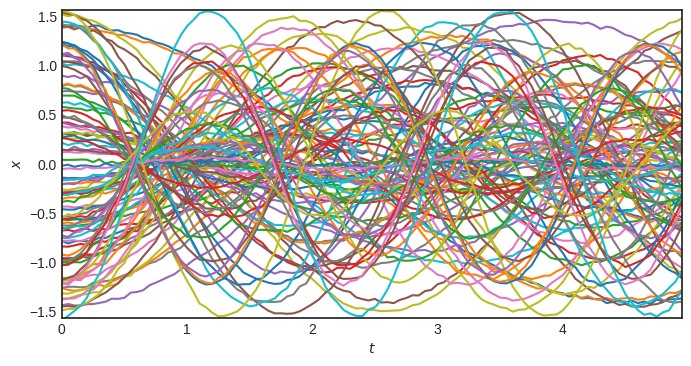

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='$t$', ylabel='$x$'>)

In [16]:
parser = PendulumOptionParser()
n_samples = 100
seed = 4321
len_episode = 100
input_string = f"""
--len-episode {len_episode}
--n-samples {n_samples}
--seed {seed}
"""
args = parser.parse_args(input_string.split())
args.outdir = None
print(args)
res_data = generate_data(args)
i_data = res_data["sims"]
i_true_params = res_data["params"]
i_init_conds = res_data["init_conds"]
sort_idx = i_true_params[:, 0].argsort()
i_true_params = i_true_params[sort_idx]
i_init_conds = i_init_conds[sort_idx]
i_data = i_data[sort_idx]
t = torch.linspace(0.0, 0.05 * (len_episode - 1), len_episode)
plot_trajectories(i_true_params, i_data, i_init_conds, ts=t, figsize=(8, 4), show_legend=False) #params are n x 1, data, n x len_episode

## One-to-Many

In [17]:
import torch
from matplotlib import pyplot as plt
import numpy as np
from src.forward_models.pendulum.options import PendulumOptionParser
from src.forward_models.pendulum import generate_data

In [18]:
parser = PendulumOptionParser()
n_samples = 5
seed = 4321
len_episode = 50
dt=0.1
input_string = f"""
--range-omega 0.785 3.14
--len-episode {len_episode}
--n-samples {n_samples}
--dt {dt}
--noise-std 0.0
--seed {seed}
"""
args = parser.parse_args(input_string.split())
args.outdir = None
print(args)
res_data = generate_data(args)
i_data, i_true_params, i_init_conds = res_data["sims"], res_data["params"], res_data["init_conds"]
sort_idx = i_true_params[:, 0].argsort()
i_true_params = i_true_params[sort_idx]
i_data = i_data[sort_idx]
i_init_conds = i_init_conds[sort_idx]
t = torch.linspace(0.0, dt * (len_episode - 1), len_episode)

INFO:Pendulum Data Generation:
Arguments: Namespace(outdir=None, device='cpu', method='rk4', filename='simulations', n_samples=5, len_episode=50, dt=0.1, range_init=[-1.57, 1.57], range_omega=[0.785, 3.14], range_gamma=None, gamma_dist='uniform', range_A=None, A_dist='uniform', range_f=None, f_dist='uniform', single_sample_parameters=0, single_sample_params_probs=[0.5], div_eps=None, noise_loc=None, noise_std=0.0, seed=4321, visualize=False, n_stoch_samples=1, one_to_one=None, shuffle_data=0, log_level='INFO', library='torch')
INFO:Pendulum Data Generation:Using random seed 4321
INFO:Pendulum Data Generation:Parameters shape: torch.Size([5, 1, 1])
INFO:Pendulum Data Generation:Generating data using the forward model


Namespace(outdir=None, device='cpu', method='rk4', filename='simulations', n_samples=5, len_episode=50, dt=0.1, range_init=[-1.57, 1.57], range_omega=[0.785, 3.14], range_gamma=None, gamma_dist='uniform', range_A=None, A_dist='uniform', range_f=None, f_dist='uniform', single_sample_parameters=0, single_sample_params_probs=[0.5], div_eps=None, noise_loc=None, noise_std=0.0, seed=4321, visualize=False, n_stoch_samples=1, one_to_one=None, shuffle_data=0, log_level='INFO', library='torch')


In [19]:
from src.forward_models.pendulum.options import PendulumOptionParser
from src.forward_models.pendulum import generate_data
parser = PendulumOptionParser()
n_stoch_samples = 15
input_string = f"""
--seed {seed}
--range-omega 0.785 3.14
--len-episode {len_episode}
--dt {dt}
--range-gamma 0.6 1.5 --gamma-dist bernoulli
--range-A 2. 2. --A-dist bernoulli
--range-f 1.2 2. --f-dist bernoulli
--single-sample-parameters 1
--noise-std 0.01
--n-samples {n_samples}
--n-stoch-samples {n_stoch_samples}
"""

t = torch.linspace(0.0, dt * (len_episode - 1), len_episode)
args = parser.parse_args(input_string.split())
args.outdir = None
print(args)
res_data = generate_data(args)
c_data, c_true_params, c_init_conds = res_data["sims"], res_data["params"], res_data["init_conds"]
#sort by the params by the first column
sort_params = c_true_params[:, 0].argsort()
c_true_params = c_true_params[sort_params]
c_data = c_data[sort_params]
c_init_conds = c_init_conds[sort_params]
assert torch.all(torch.isclose(c_true_params[::n_stoch_samples][:10, :1], i_true_params[:10]))

INFO:Pendulum Data Generation:
Arguments: Namespace(outdir=None, device='cpu', method='rk4', filename='simulations', n_samples=5, len_episode=50, dt=0.1, range_init=[-1.57, 1.57], range_omega=[0.785, 3.14], range_gamma=[0.6, 1.5], gamma_dist='bernoulli', range_A=[2.0, 2.0], A_dist='bernoulli', range_f=[1.2, 2.0], f_dist='bernoulli', single_sample_parameters=1, single_sample_params_probs=[0.5], div_eps=None, noise_loc=None, noise_std=0.01, seed=4321, visualize=False, n_stoch_samples=15, one_to_one=None, shuffle_data=0, log_level='INFO', library='torch')
INFO:Pendulum Data Generation:Using random seed 4321
INFO:Pendulum Data Generation:Parameters shape: torch.Size([5, 15, 4])
INFO:Pendulum Data Generation:Generating data using the forward model


Namespace(outdir=None, device='cpu', method='rk4', filename='simulations', n_samples=5, len_episode=50, dt=0.1, range_init=[-1.57, 1.57], range_omega=[0.785, 3.14], range_gamma=[0.6, 1.5], gamma_dist='bernoulli', range_A=[2.0, 2.0], A_dist='bernoulli', range_f=[1.2, 2.0], f_dist='bernoulli', single_sample_parameters=1, single_sample_params_probs=[0.5], div_eps=None, noise_loc=None, noise_std=0.01, seed=4321, visualize=False, n_stoch_samples=15, one_to_one=None, shuffle_data=0, log_level='INFO', library='torch')


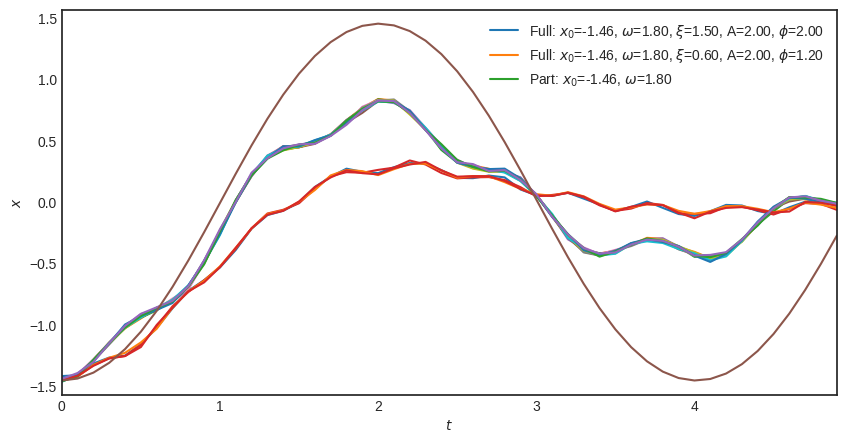

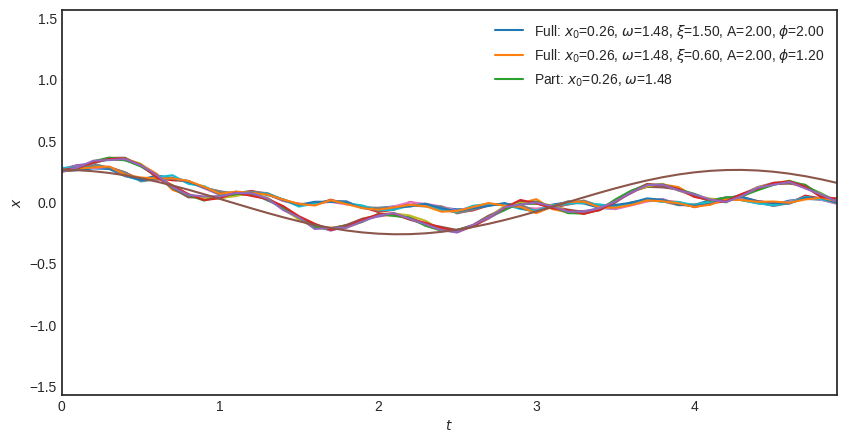

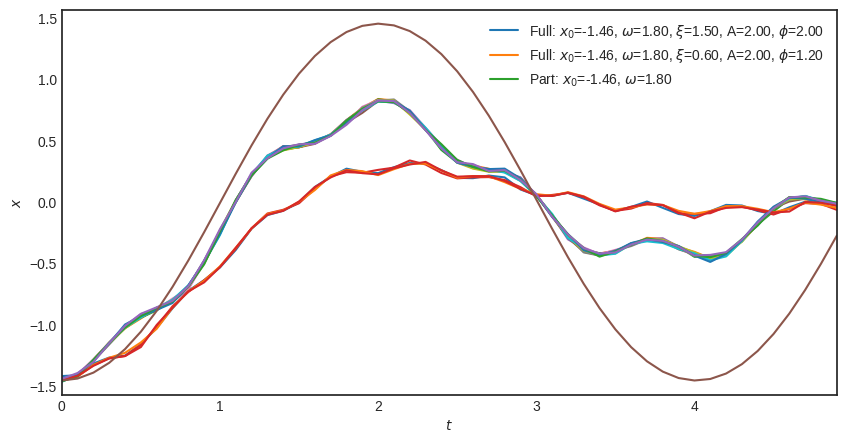

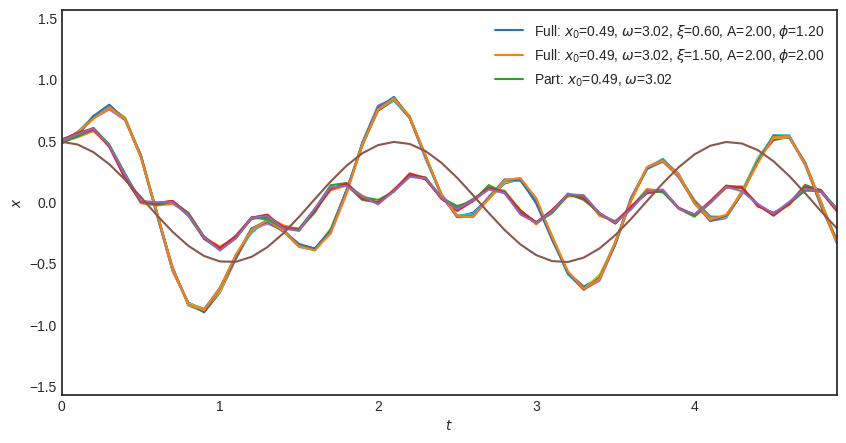

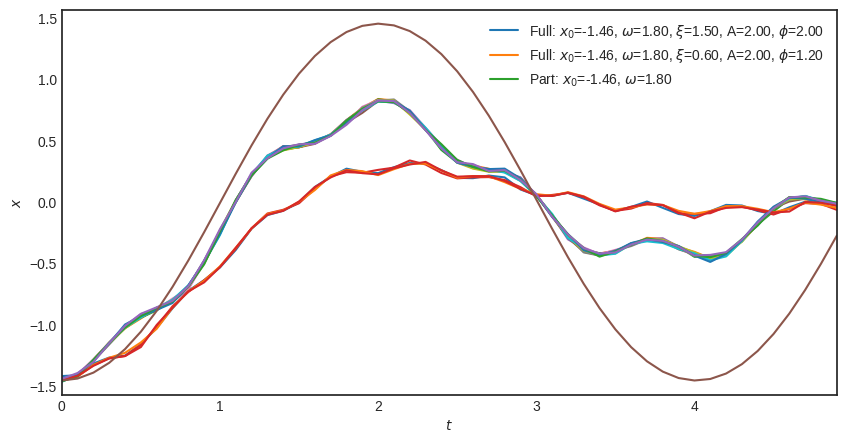

In [20]:

idx = np.random.randint(0, n_samples, n_samples)
for i in range(n_samples):
    tmp_c_data = c_data.reshape(n_samples, n_stoch_samples, -1)[idx[i]]
    tmp_c_params = c_true_params.reshape(n_samples, n_stoch_samples, -1)[idx[i]]
    tmp_c_init_conds = c_init_conds.reshape(n_samples, n_stoch_samples, -1)[idx[i]]
    # sort i_data and i_params by the first column
    i_sort = i_true_params[:, 0].argsort()
    i_true_params = i_true_params[i_sort]
    i_data = i_data[i_sort]


    tmp_i_data = i_data[idx[i]]
    tmp_i_params = i_true_params[idx[i]]
    tmp_i_init_conds = i_init_conds[idx[i]]
    _params = tmp_c_params.reshape(n_stoch_samples, -1).tolist()
    _params.append(tmp_i_params)
    # append tmp_i_data to tmp_c_data
    _sims = np.vstack((tmp_c_data, tmp_i_data))
    _init_conds = tmp_c_init_conds.reshape(n_stoch_samples, -1).tolist()
    _init_conds.append(tmp_i_init_conds)

    plot_trajectories(_params, _sims,_init_conds, t, figsize=(10, 5), show_legend=True)
    plt.show()

### Complex 4 mode friction

INFO:Pendulum Data Generation:
Arguments: Namespace(outdir=None, device='cpu', method='euler', filename='simulations', n_samples=25, len_episode=50, dt=0.1, range_init=[-1.57, 1.57], range_omega=[0.785, 3.14], range_gamma=None, gamma_dist='uniform', range_A=None, A_dist='uniform', range_f=None, f_dist='uniform', single_sample_parameters=0, single_sample_params_probs=[0.5], div_eps=None, noise_loc=None, noise_std=0.0, seed=4321, visualize=False, n_stoch_samples=1, one_to_one=None, shuffle_data=0, log_level='INFO', library='torch')
INFO:Pendulum Data Generation:Using random seed 4321
INFO:Pendulum Data Generation:Parameters shape: torch.Size([25, 1, 1])
INFO:Pendulum Data Generation:Generating data using the forward model


Namespace(outdir=None, device='cpu', method='euler', filename='simulations', n_samples=25, len_episode=50, dt=0.1, range_init=[-1.57, 1.57], range_omega=[0.785, 3.14], range_gamma=None, gamma_dist='uniform', range_A=None, A_dist='uniform', range_f=None, f_dist='uniform', single_sample_parameters=0, single_sample_params_probs=[0.5], div_eps=None, noise_loc=None, noise_std=0.0, seed=4321, visualize=False, n_stoch_samples=1, one_to_one=None, shuffle_data=0, log_level='INFO', library='torch')


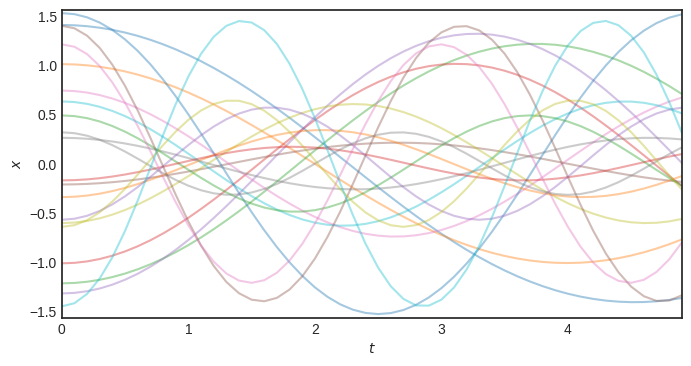

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='$t$', ylabel='$x$'>)

In [21]:
from src.forward_models.pendulum.options import PendulumOptionParser
from src.forward_models.pendulum import generate_data
parser = PendulumOptionParser()
n_samples = 25
seed = 4321
len_episode = 50
dt=0.1
input_string = f"""
--range-omega 0.785 3.14
--len-episode {len_episode}
--n-samples {n_samples}
--dt {dt}
--noise-std 0.0
--seed {seed}
--method euler
"""
args = parser.parse_args(input_string.split())
args.outdir = None
print(args)
res_data = generate_data(args)
i_data, i_true_params, i_init_conds = res_data["sims"], res_data["params"], res_data["init_conds"]
sort_idx = i_true_params[:, 0].argsort()
i_true_params = i_true_params[sort_idx]
i_data = i_data[sort_idx]
i_init_conds = i_init_conds[sort_idx]
t = torch.linspace(0.0, dt * (len_episode - 1), len_episode)
plot_trajectories(i_true_params[:20], i_data[:20], i_init_conds[:20], t, figsize=(8, 4), show_legend=False, alpha=0.4)

In [22]:
parser = PendulumOptionParser()
n_stoch_samples = 4
input_string = f"""
--seed {seed}
--range-omega 0.785 3.14
--len-episode {len_episode}
--dt {dt}
--range-gamma 0.6 0.8 1 1.5 --gamma-dist categorical
--range-A 0 0 0 0 --A-dist categorical
--range-f 0 0 0 0 --f-dist categorical
--single-sample-parameters 1
--single-sample-params-probs 0.25 0.25 0.25 0.25
--n-samples {n_samples}
--n-stoch-samples {n_stoch_samples}
--method rk4
--noise-std 0.02
"""

t = torch.linspace(0.0, dt * (len_episode - 1), len_episode)
args = parser.parse_args(input_string.split())
args.outdir = None
print(args)
res_data = generate_data(args)
c_data, c_true_params, c_init_conds = res_data["sims"], res_data["params"], res_data["init_conds"]
#sort by the params by the first column
sort_params = c_true_params[:, 0].argsort()
c_true_params = c_true_params[sort_params]
c_data = c_data[sort_params]
assert torch.all(torch.isclose(c_true_params[::n_stoch_samples][:10, :1], i_true_params[:10]))

INFO:Pendulum Data Generation:
Arguments: Namespace(outdir=None, device='cpu', method='rk4', filename='simulations', n_samples=25, len_episode=50, dt=0.1, range_init=[-1.57, 1.57], range_omega=[0.785, 3.14], range_gamma=[0.6, 0.8, 1.0, 1.5], gamma_dist='categorical', range_A=[0.0, 0.0, 0.0, 0.0], A_dist='categorical', range_f=[0.0, 0.0, 0.0, 0.0], f_dist='categorical', single_sample_parameters=1, single_sample_params_probs=[0.25, 0.25, 0.25, 0.25], div_eps=None, noise_loc=None, noise_std=0.02, seed=4321, visualize=False, n_stoch_samples=4, one_to_one=None, shuffle_data=0, log_level='INFO', library='torch')
INFO:Pendulum Data Generation:Using random seed 4321
/home/jeet/Documents/phd/dmml/ot-model-misspecification/src/sampler/distributions.py:145: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.classes = torch.tensor(classes, device=d

Namespace(outdir=None, device='cpu', method='rk4', filename='simulations', n_samples=25, len_episode=50, dt=0.1, range_init=[-1.57, 1.57], range_omega=[0.785, 3.14], range_gamma=[0.6, 0.8, 1.0, 1.5], gamma_dist='categorical', range_A=[0.0, 0.0, 0.0, 0.0], A_dist='categorical', range_f=[0.0, 0.0, 0.0, 0.0], f_dist='categorical', single_sample_parameters=1, single_sample_params_probs=[0.25, 0.25, 0.25, 0.25], div_eps=None, noise_loc=None, noise_std=0.02, seed=4321, visualize=False, n_stoch_samples=4, one_to_one=None, shuffle_data=0, log_level='INFO', library='torch')


Saved figure to ./friction-less.png


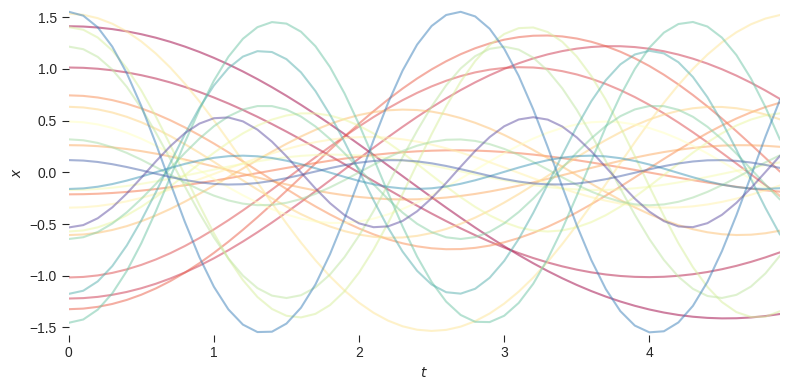

Saved figure to ./damped.png


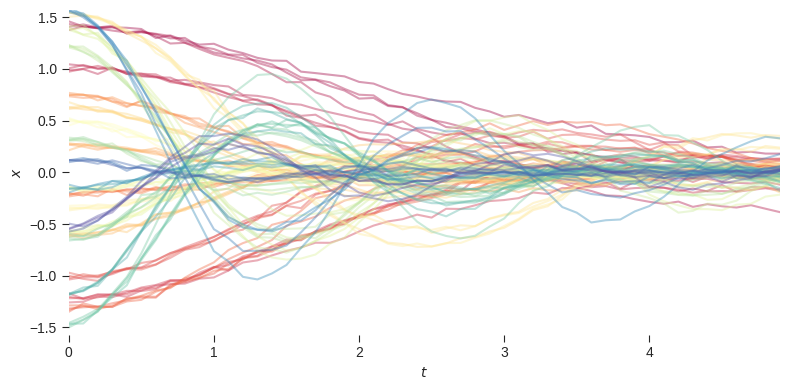

In [23]:
from src.forward_models.pendulum.visualization import plot_trajectories_minimal
plot_trajectories_minimal(i_true_params[:], i_data[:], i_init_conds[:], t, figsize=(8, 4), show_legend=False, alpha=0.5, savefig=True, file_name="friction-less.png", cmap_theme="Spectral")
plot_trajectories_minimal(c_true_params[:], c_data[:], c_init_conds[:], t, figsize=(8, 4), show_legend=False, alpha=0.4, savefig=True, file_name="damped.png", cmap_theme="Spectral")

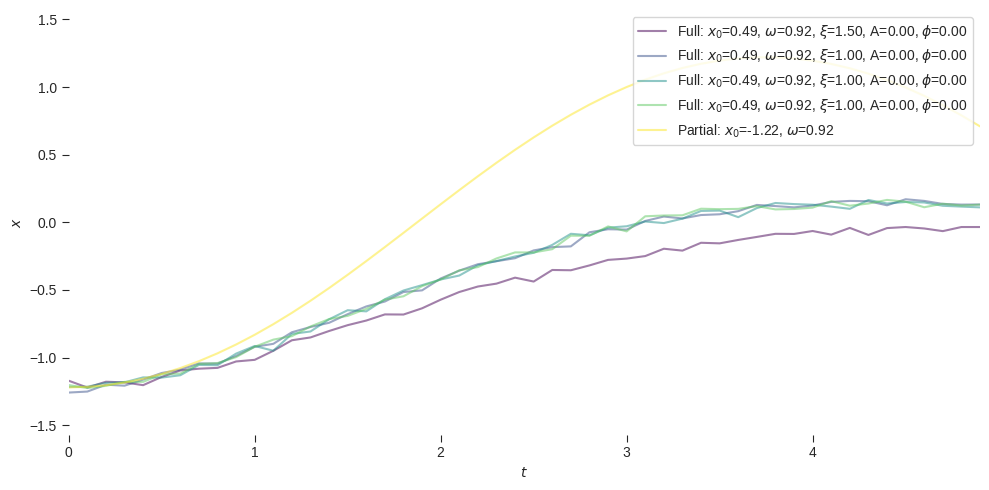

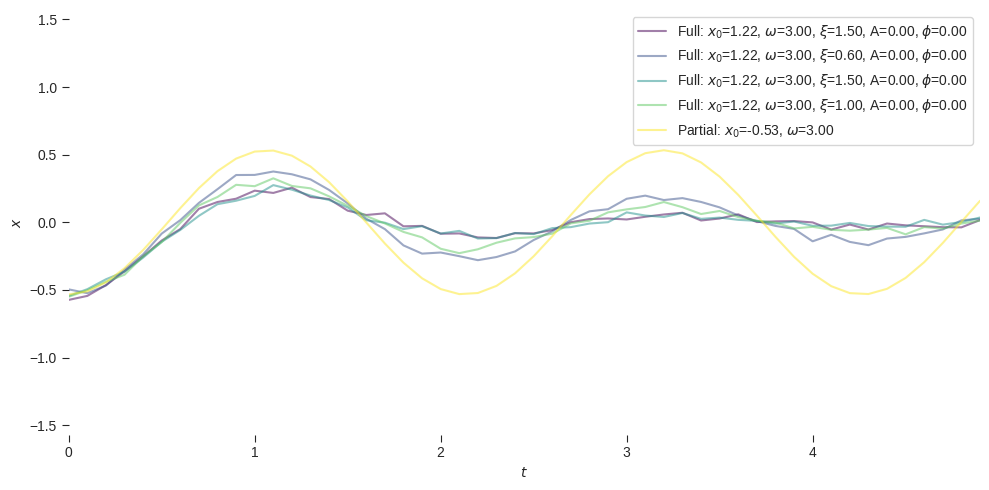

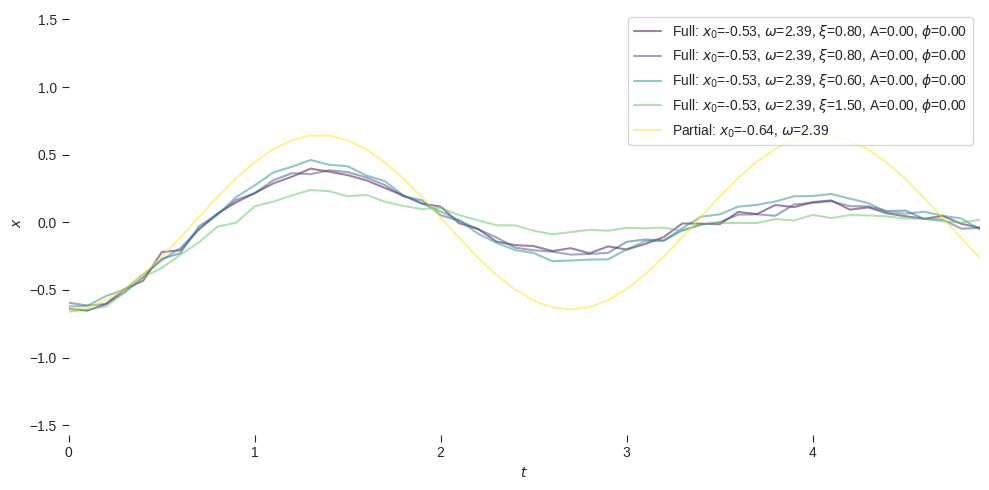

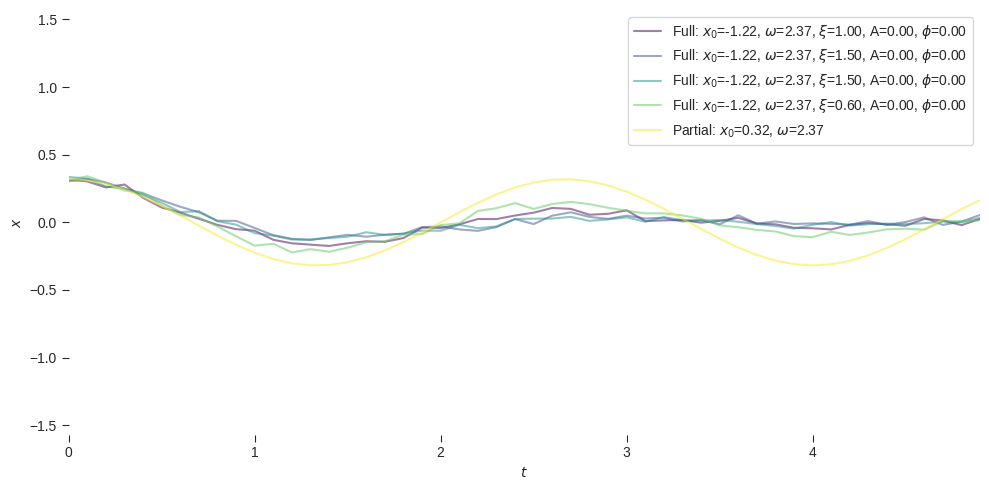

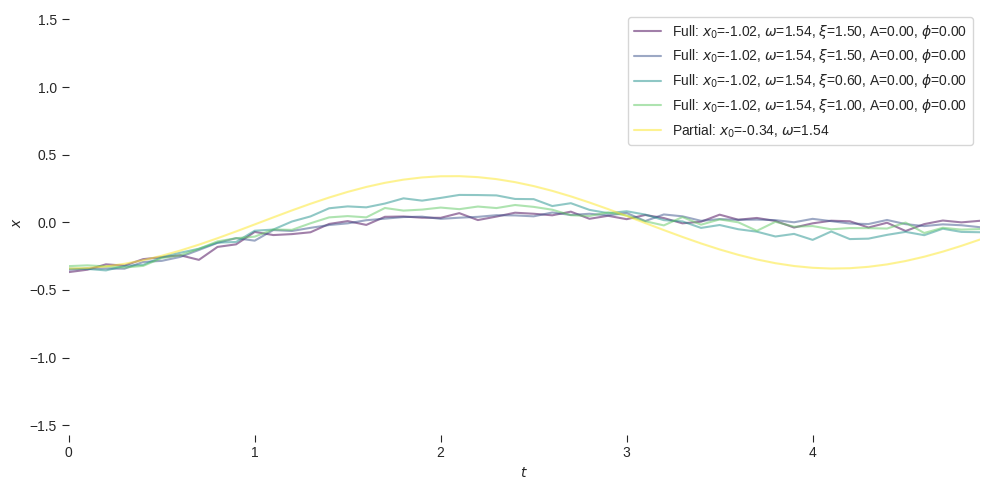

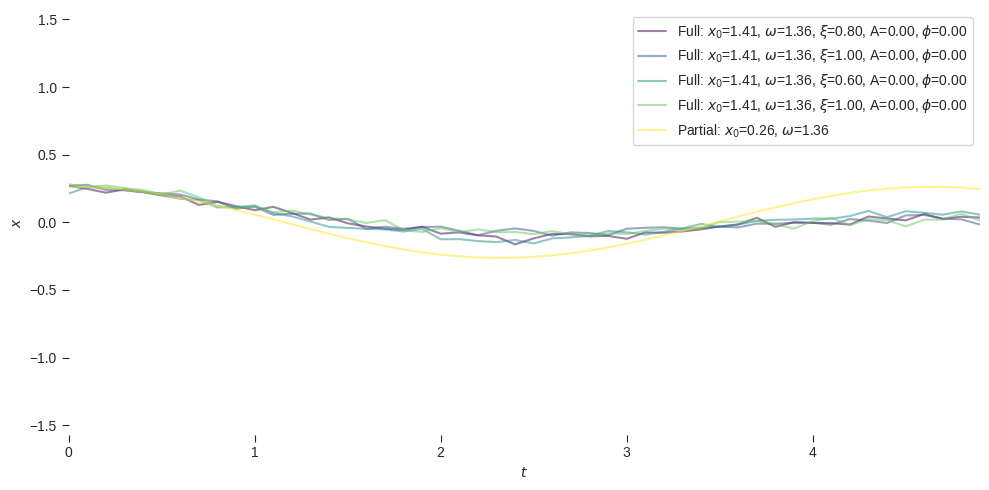

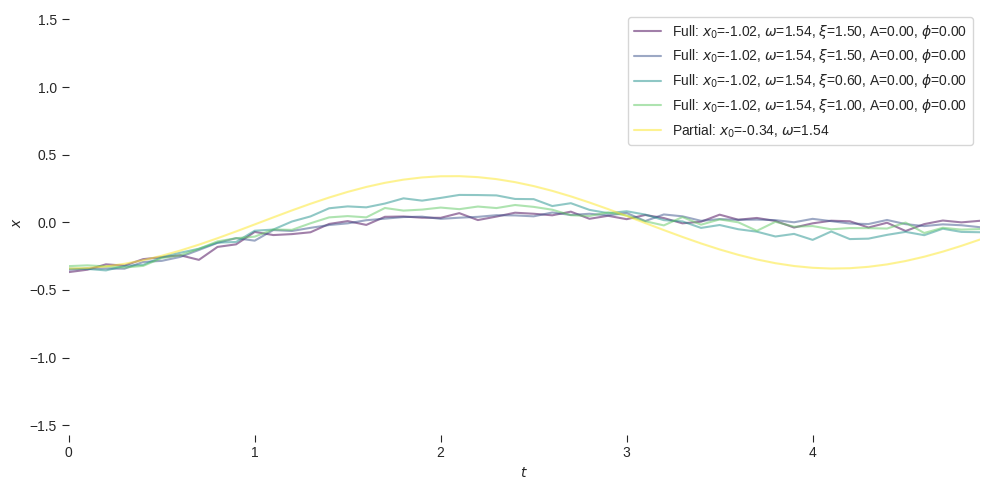

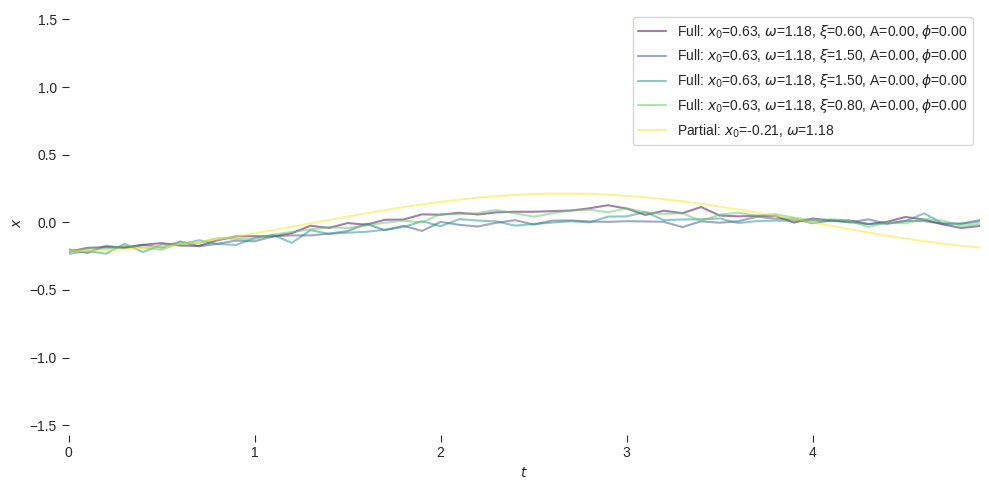

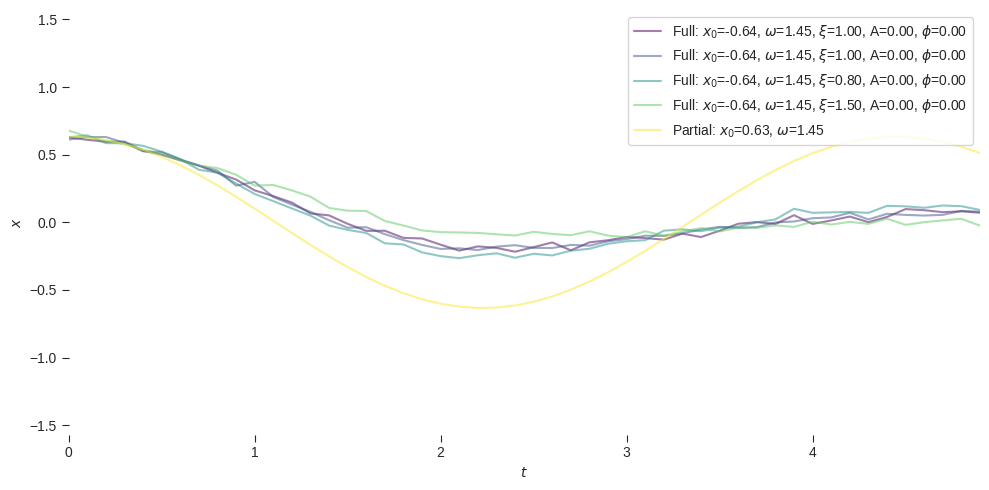

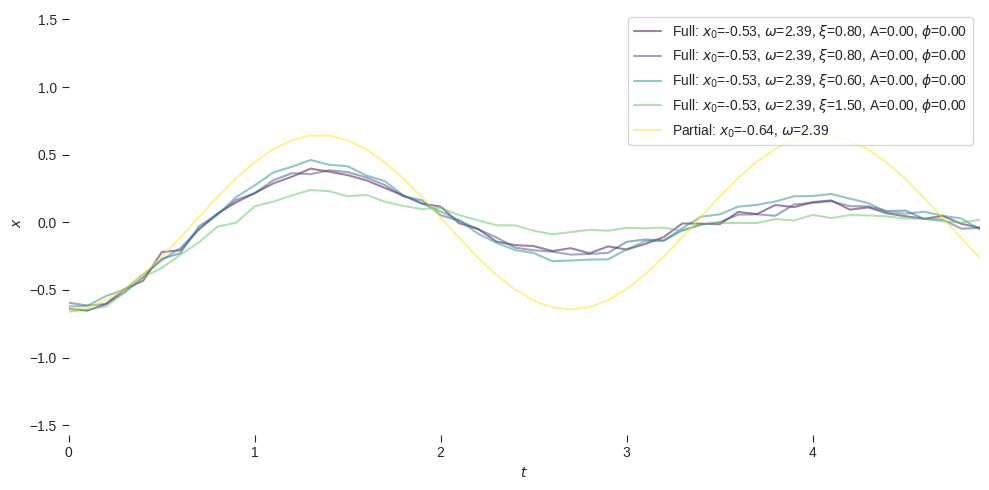

In [24]:

view_n_samples = 10
idx = np.random.randint(0, n_samples, view_n_samples)
for i in range(view_n_samples):
    tmp_c_data = c_data.reshape(n_samples, n_stoch_samples, -1)[idx[i]]
    tmp_c_params = c_true_params.reshape(n_samples, n_stoch_samples, -1)[idx[i]]
    
    tmp_i_data = i_data[idx[i]]
    tmp_i_params = i_true_params[idx[i]]
    _params = tmp_c_params.reshape(n_stoch_samples, -1).tolist()
    _params.append(tmp_i_params)
    _init_conds = c_init_conds.reshape(n_samples, n_stoch_samples, -1)[idx[i]].tolist()
    _init_conds.append(i_init_conds[idx[i]])
    # append tmp_i_data to tmp_c_data
    _sims = np.vstack((tmp_c_data, tmp_i_data))
    plot_trajectories_minimal(_params, _sims, _init_conds, t, figsize=(10, 5), alpha=0.5)
    plt.show()

### Many modes friction

In [25]:
parser = PendulumOptionParser()
n_stoch_samples = 16
input_string = f"""
--seed {seed}
--range-omega 0.785 3.14
--len-episode {len_episode}
--dt {dt}
--range-gamma 0.2 1.5
--range-A 0 0 
--range-f 0 0 
--n-samples {n_samples}
--n-stoch-samples {n_stoch_samples}
--method rk4
--noise-std 0.0
"""
t = torch.linspace(0.0, dt * (len_episode - 1), len_episode)
args = parser.parse_args(input_string.split())
args.outdir = None
print(args)
res_data = generate_data(args)
c_data, c_true_params, c_init_conds = res_data["sims"], res_data["params"], res_data["init_conds"]
#sort by the params by the first column
sort_params = c_true_params[:, 0].argsort()
c_true_params = c_true_params[sort_params]
c_data = c_data[sort_params]
assert torch.all(torch.isclose(c_true_params[::n_stoch_samples][:10, :1], i_true_params[:10]))

INFO:Pendulum Data Generation:
Arguments: Namespace(outdir=None, device='cpu', method='rk4', filename='simulations', n_samples=25, len_episode=50, dt=0.1, range_init=[-1.57, 1.57], range_omega=[0.785, 3.14], range_gamma=[0.2, 1.5], gamma_dist='uniform', range_A=[0.0, 0.0], A_dist='uniform', range_f=[0.0, 0.0], f_dist='uniform', single_sample_parameters=0, single_sample_params_probs=[0.5], div_eps=None, noise_loc=None, noise_std=0.0, seed=4321, visualize=False, n_stoch_samples=16, one_to_one=None, shuffle_data=0, log_level='INFO', library='torch')
INFO:Pendulum Data Generation:Using random seed 4321
INFO:Pendulum Data Generation:Using one-to-many problem setting with 16 stochastic samples for each parameter
INFO:Pendulum Data Generation:Parameters shape: torch.Size([25, 16, 4])
INFO:Pendulum Data Generation:Generating data using the forward model


Namespace(outdir=None, device='cpu', method='rk4', filename='simulations', n_samples=25, len_episode=50, dt=0.1, range_init=[-1.57, 1.57], range_omega=[0.785, 3.14], range_gamma=[0.2, 1.5], gamma_dist='uniform', range_A=[0.0, 0.0], A_dist='uniform', range_f=[0.0, 0.0], f_dist='uniform', single_sample_parameters=0, single_sample_params_probs=[0.5], div_eps=None, noise_loc=None, noise_std=0.0, seed=4321, visualize=False, n_stoch_samples=16, one_to_one=None, shuffle_data=0, log_level='INFO', library='torch')


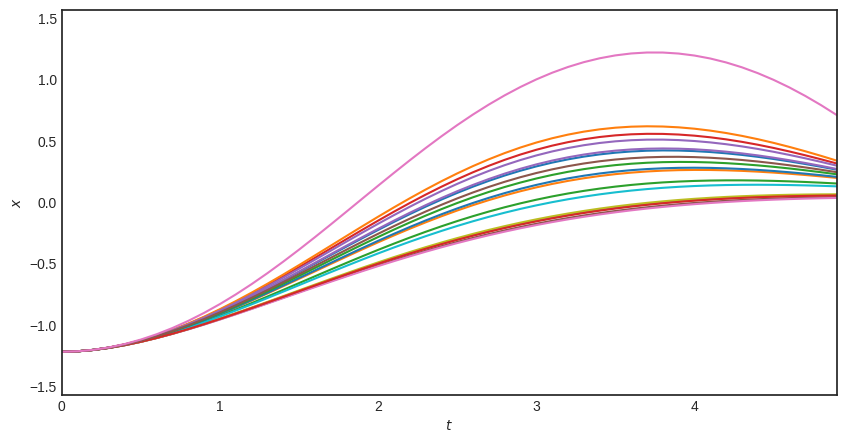

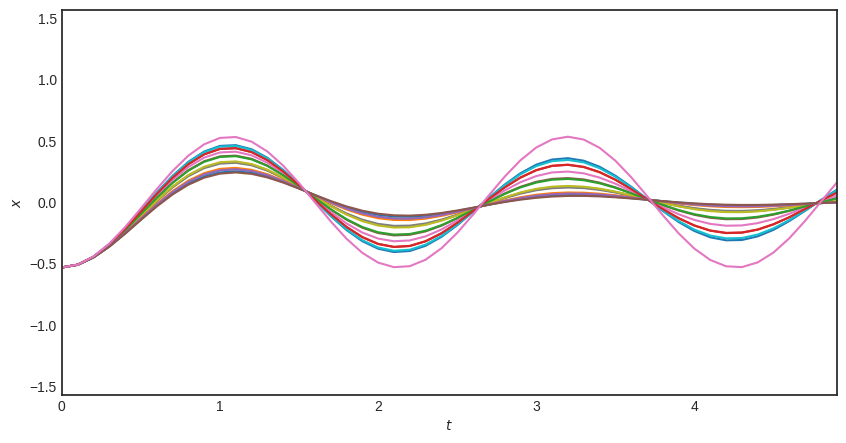

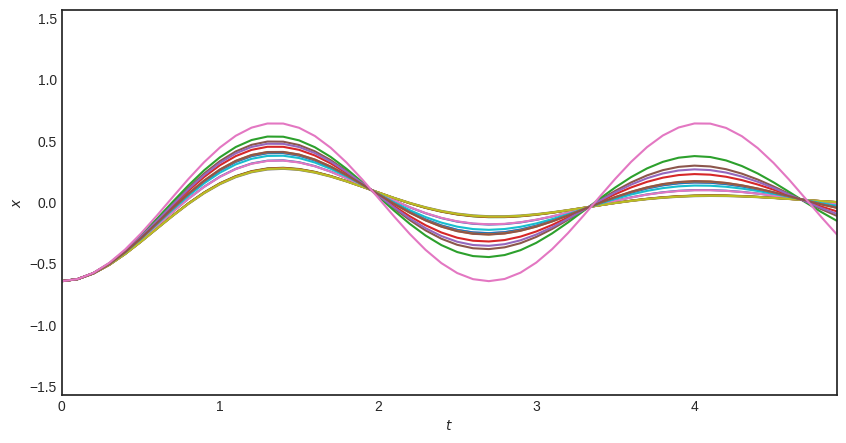

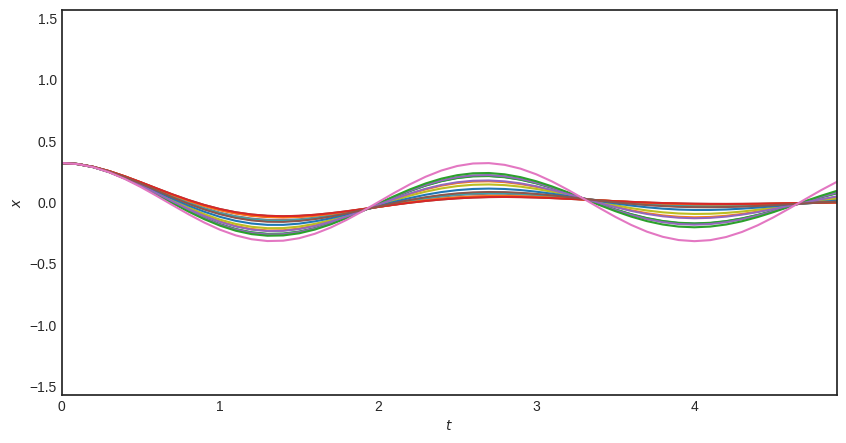

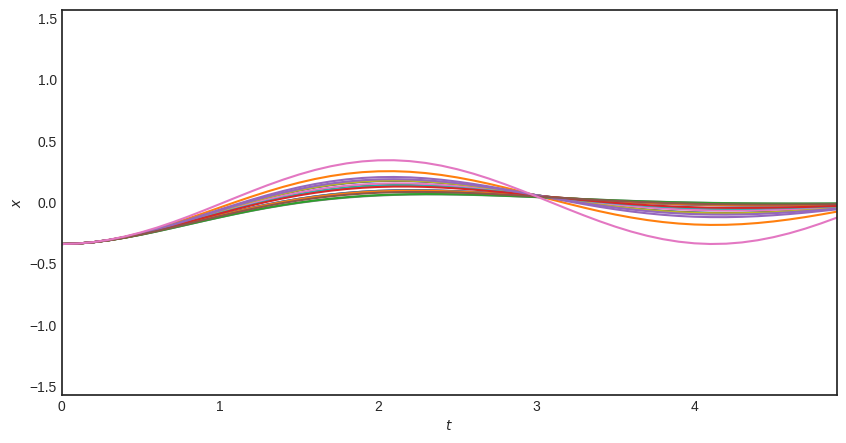

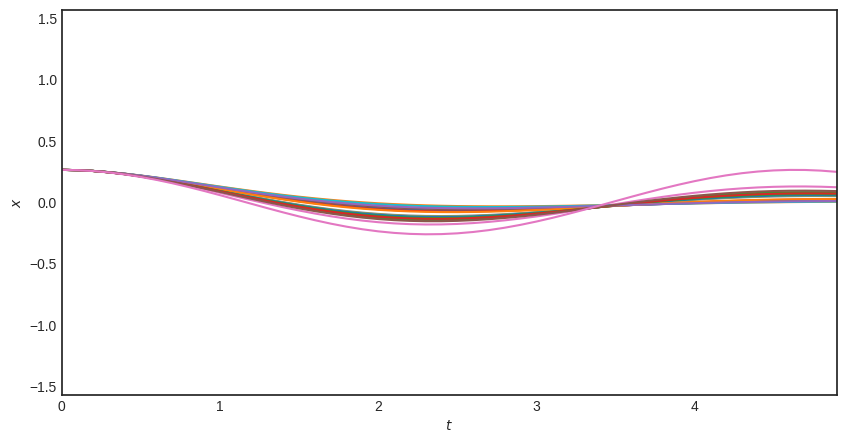

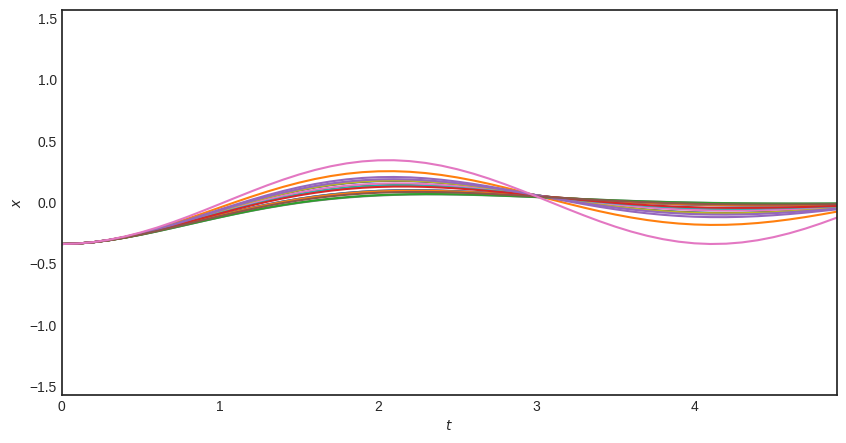

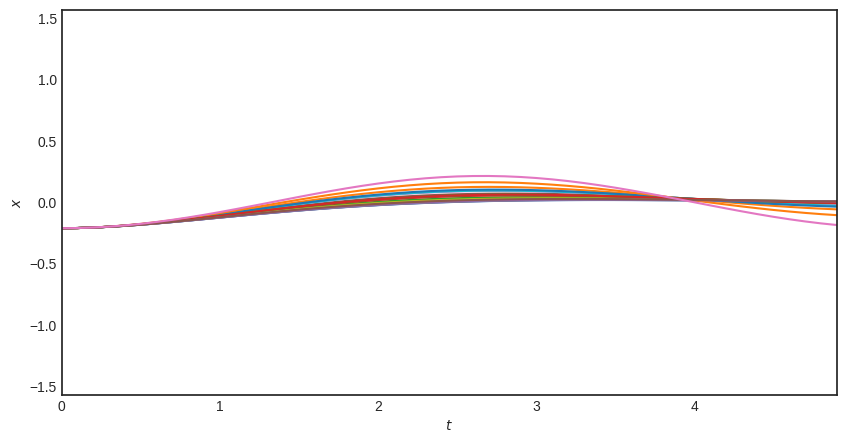

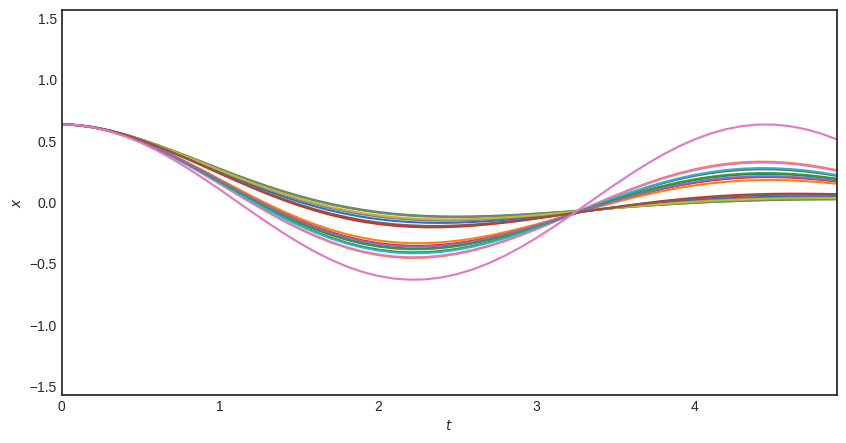

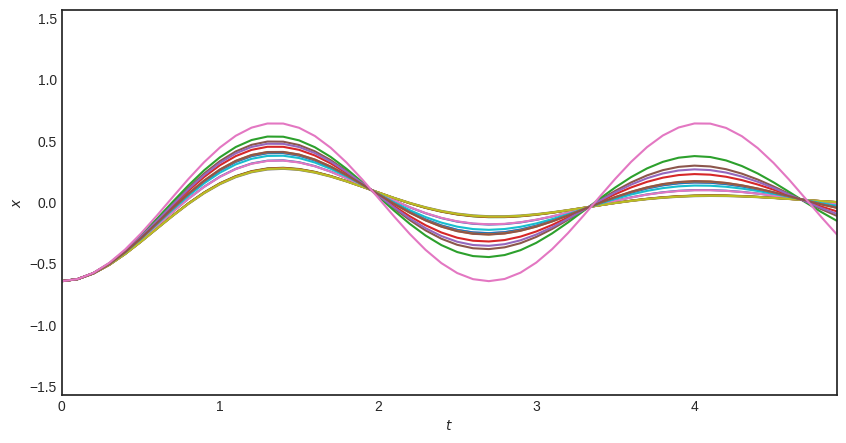

In [26]:

view_n_samples = 10
idx = np.random.randint(0, n_samples, view_n_samples)
for i in range(view_n_samples):
    tmp_c_data = c_data.reshape(n_samples, n_stoch_samples, -1)[idx[i]]
    tmp_c_params = c_true_params.reshape(n_samples, n_stoch_samples, -1)[idx[i]]
    tmp_i_data = i_data[idx[i]]
    tmp_i_params = i_true_params[idx[i]]
    _params = tmp_c_params.reshape(n_stoch_samples, -1).tolist()
    _params.append(tmp_i_params)
    _init_conds = c_init_conds.reshape(n_samples, n_stoch_samples, -1)[idx[i]].tolist()
    _init_conds.append(i_init_conds[idx[i]])
    _sims = np.vstack((tmp_c_data, tmp_i_data))
    plot_trajectories(_params, _sims, _init_conds, t, figsize=(10, 5), show_legend=False)
    plt.show()